# estdel

In [31]:
import numpy as np
import random
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import hera_cal
import pyuvdata

import estdel

## Estimating the cable delay for a redundant visibility ratio

 Load data

In [7]:
uvd = pyuvdata.UVData()

# data
miriad_path = '../../zen_data/zen.2458098.58037.xx.HH.uv'
uvd.read_miriad(miriad_path)

# get the redundant baselines for that data
aa = hera_cal.utils.get_aa_from_uv(uvd)
info = hera_cal.omni.aa_to_info(aa)
red_bls = np.array(info.get_reds())

From one redundant baseline select two unique separations

In [145]:
red_bl = red_bls[np.random.randint(len(red_bls))]
two_seps = [random.sample(red_bl, 2)][0]  
two_seps

[(1, 142), (2, 143)]

Get data for those separations 

In [146]:
data = {}
for sep in two_seps:
    data[sep] = uvd.get_data(sep)

Construct visibility ratio

In [147]:
V = data[two_seps[0]] * data[two_seps[1]].conjugate()

Take a look

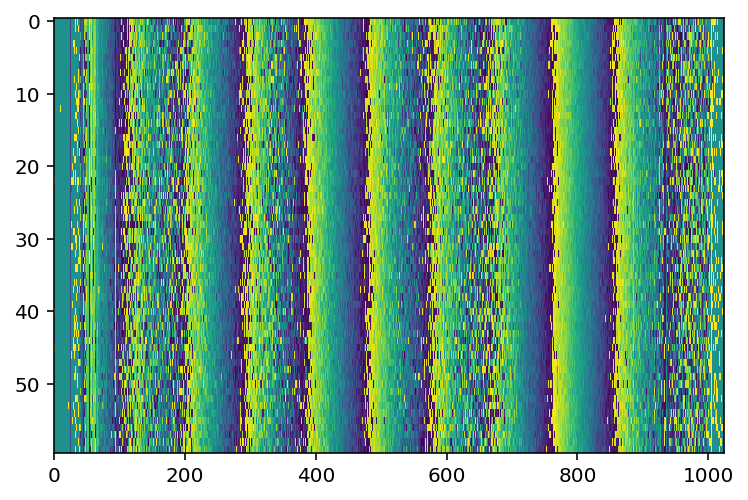

In [148]:
plt.imshow(np.angle(V), aspect = 'auto');

## Predict cable delays for data

In [149]:
predictor = estdel.Cable_Delay(V, verbose=False)
predictions = predictor.predict()

Raw predictions are in range -0.0400, 0.0400, unitless, based on 1024 unitless frequency channels.

Convert based on desired channel width

In [150]:
freqs = np.linspace(0.100,0.200,1024) # 0.100 GHz - 0.200 GHz range
channel_width_in_GHz = np.mean(np.diff(freqs))
predictions_ns = predictions / channel_width_in_GHz # predictions now in nanoseconds

One visibility should have one overall total cable delay.

In [151]:
print('Mean cable delay for this visibility ratio = {}ns'.format(np.mean(predictions_ns)))

Mean cable delay for this visibility ratio = 110.7227ns


In [152]:
print('Standard deviation of cable delay for this visibility ratio = {}ns'.format(np.std(predictions_ns)))

Standard deviation of cable delay for this visibility ratio = 1.37715035853ns


Plot the angle of each row of the visibility ratio side by side with the prediction

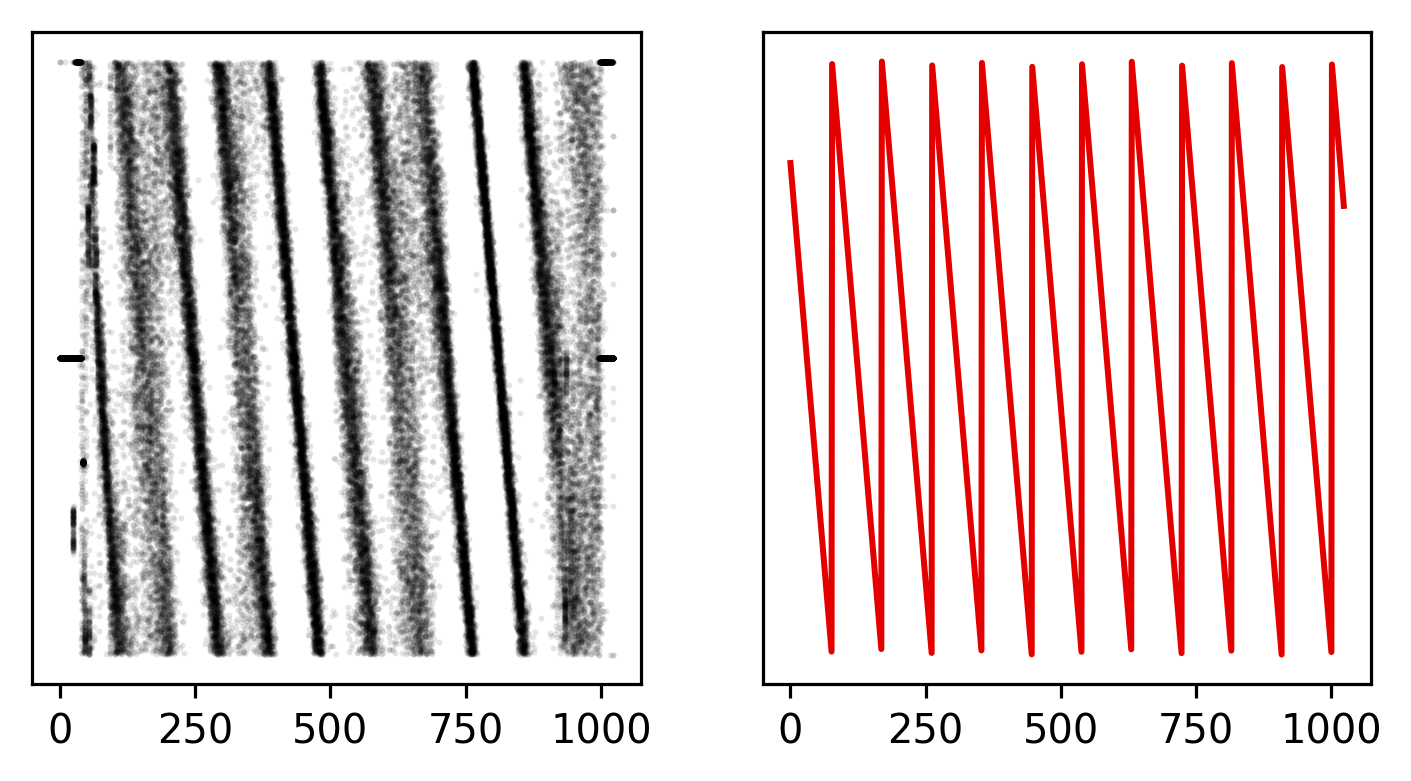

In [153]:
fig, axes = plt.subplots(1,2, figsize = (6,3), dpi = 144)
for row in V:
    axes[0].plot(np.angle(row), ls = 'none', marker = '.', markersize = 1, alpha = 0.1, color = 'black')
axes[1].plot(np.angle(np.exp(-2j*np.pi*(freqs*np.mean(predictions_ns) + np.random.uniform()))), color = '#E50000')
for ax in axes:
    ax.set_yticks([])
plt.show()